In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [2]:
fecha =['20','23']
time_decay=[20,60]
error=[0.5,1/6]
t=[]

def ajuste(t,A,tau,B):
    return  A*np.exp(-t/tau) + B

t=2.41±0.08us
t=2.26±0.10us


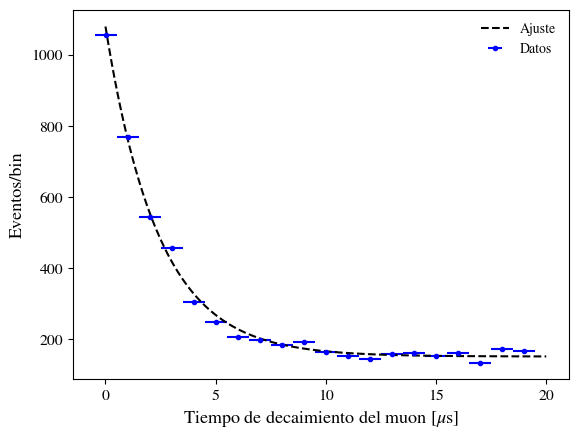

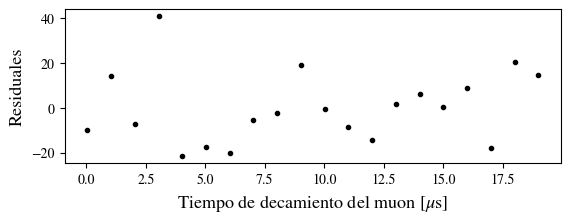

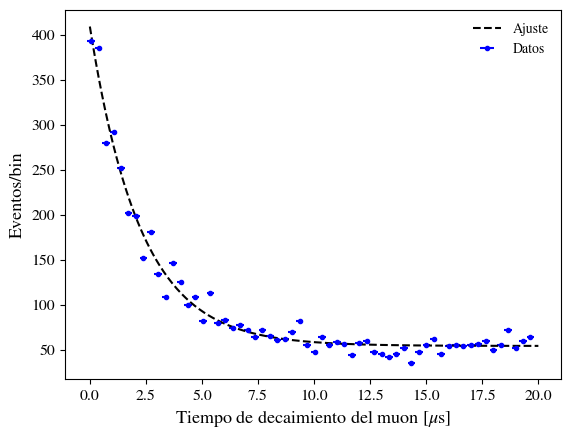

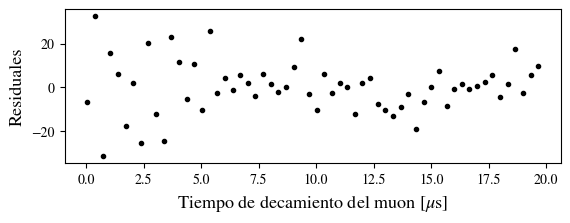

In [35]:
for  i in enumerate(fecha):
    data = pd.read_csv(f'Datos {i[1]} Nov.csv', sep=' ')
    decay=data[data['N']<=35000]/1000 #conversión a us y 
    values=decay['N'].values
    conteos, bins = np.histogram(values, bins = time_decay[i[0]])
    guess= [354, 2, 54]
    param, covar = optimize.curve_fit(ajuste,bins[:-1],conteos,p0=guess)
    print('t={:.2f}\u00B1{:.2f}us'.format(param[1],np.sqrt(covar[1][1])))
    x_plot=np.linspace(0,20,300)
    plt.figure()
    
    plt.errorbar(bins[:-1],conteos,fmt='.',xerr=error[i[0]],c='blue',label='Datos')
    plt.plot(x_plot,ajuste(x_plot,*param),c='black',label='Ajuste',linestyle='--')
    plt.xlabel(r'Tiempo de decaimiento del muon [$\mu$s]',fontsize=13,c='black')
    plt.ylabel('Eventos/bin',fontsize=13,c='black')
    plt.tick_params(axis='both', colors='black',labelsize=11.3)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.legend(edgecolor='none')
    
    Res=conteos-ajuste(bins[:-1], *param)
    plt.figure(figsize=(6.4,2))
    plt.scatter(bins[:-1], Res, marker='.',c='black')
    plt.xlabel(r'Tiempo de decamiento del muon [$\mu$s]',fontsize=13,c='black')
    plt.ylabel('Residuales',fontsize=13,c='black')